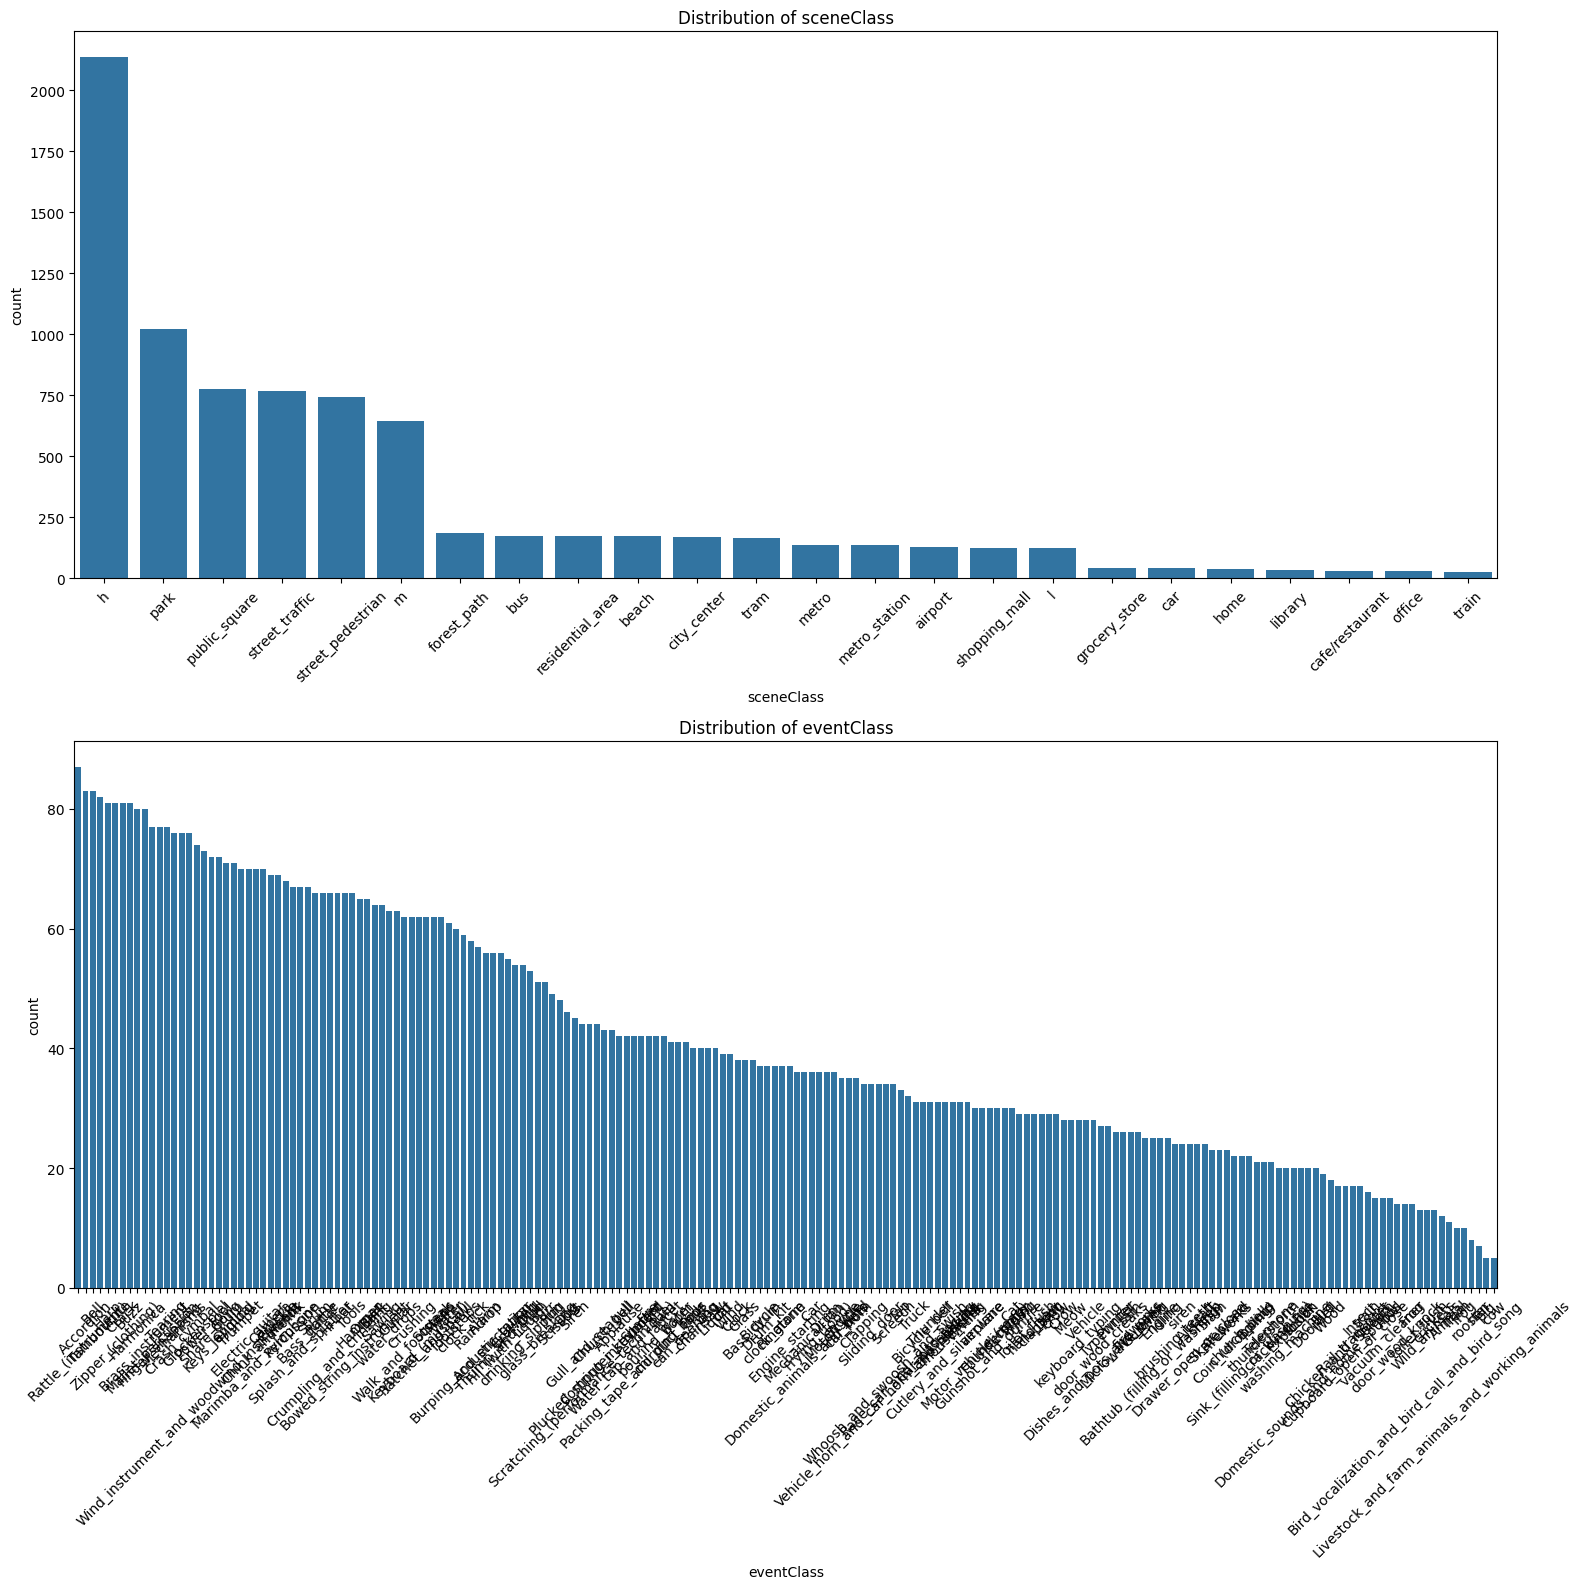

Value counts for sceneClass:
 sceneClass
h                    2134
park                 1021
public_square         773
street_traffic        765
street_pedestrian     743
m                     643
forest_path           185
bus                   173
residential_area      172
beach                 171
city_center           170
tram                  166
metro                 136
metro_station         134
airport               128
shopping_mall         124
l                     122
grocery_store          42
car                    40
home                   38
library                35
cafe/restaurant        30
office                 28
train                  27
Name: count, dtype: int64

Value counts for eventClass:
 eventClass
Rattle_(instrument)    87
Accordion              83
Bell                   83
Tambourine             82
Harp                   81
                       ..
frog                   10
rooster                 8
hen                     7
pig                     5
cow    

In [9]:
path = "/home/user/datasets/PolSESS_C_both/PolSESS_C_both/train/corpus_PolSESS_C_both_train_final.csv"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(path)

fig, axes = plt.subplots(2, 1, figsize=(16, 16))

sns.countplot(data=df, x='sceneClass', ax=axes[0], order=df['sceneClass'].value_counts().index)
axes[0].set_title('Distribution of sceneClass')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='eventClass', ax=axes[1], order=df['eventClass'].value_counts().index)
axes[1].set_title('Distribution of eventClass')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Value counts for sceneClass:\n", df['sceneClass'].value_counts())
print("\nValue counts for eventClass:\n", df['eventClass'].value_counts())
print(f"\nTotal number of samples: {len(df)}")


Found 15962 WAV files


Processing WAV files:   0%|          | 0/15962 [00:00<?, ?it/s]


Volume Statistics:
Linear amplitude:
count    15962.000000
mean         0.161152
std          0.107353
min          0.000031
25%          0.085449
50%          0.133514
75%          0.207420
max          1.000000
Name: max_volume_linear, dtype: float64

Decibels (dBFS):
count    1.596200e+04
mean    -1.755645e+01
std      5.586513e+00
min     -9.030897e+01
25%     -2.136584e+01
50%     -1.748944e+01
75%     -1.366297e+01
max      8.685890e-10
Name: max_volume_dB, dtype: float64

Min volume: -90.31 dB (0.000031 linear)
Max volume: 0.00 dB (1.000000 linear)
Mean volume: -17.56 dB
Median volume: -17.49 dB


/tmp/ipykernel_54782/37581105.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0, 0].legend()


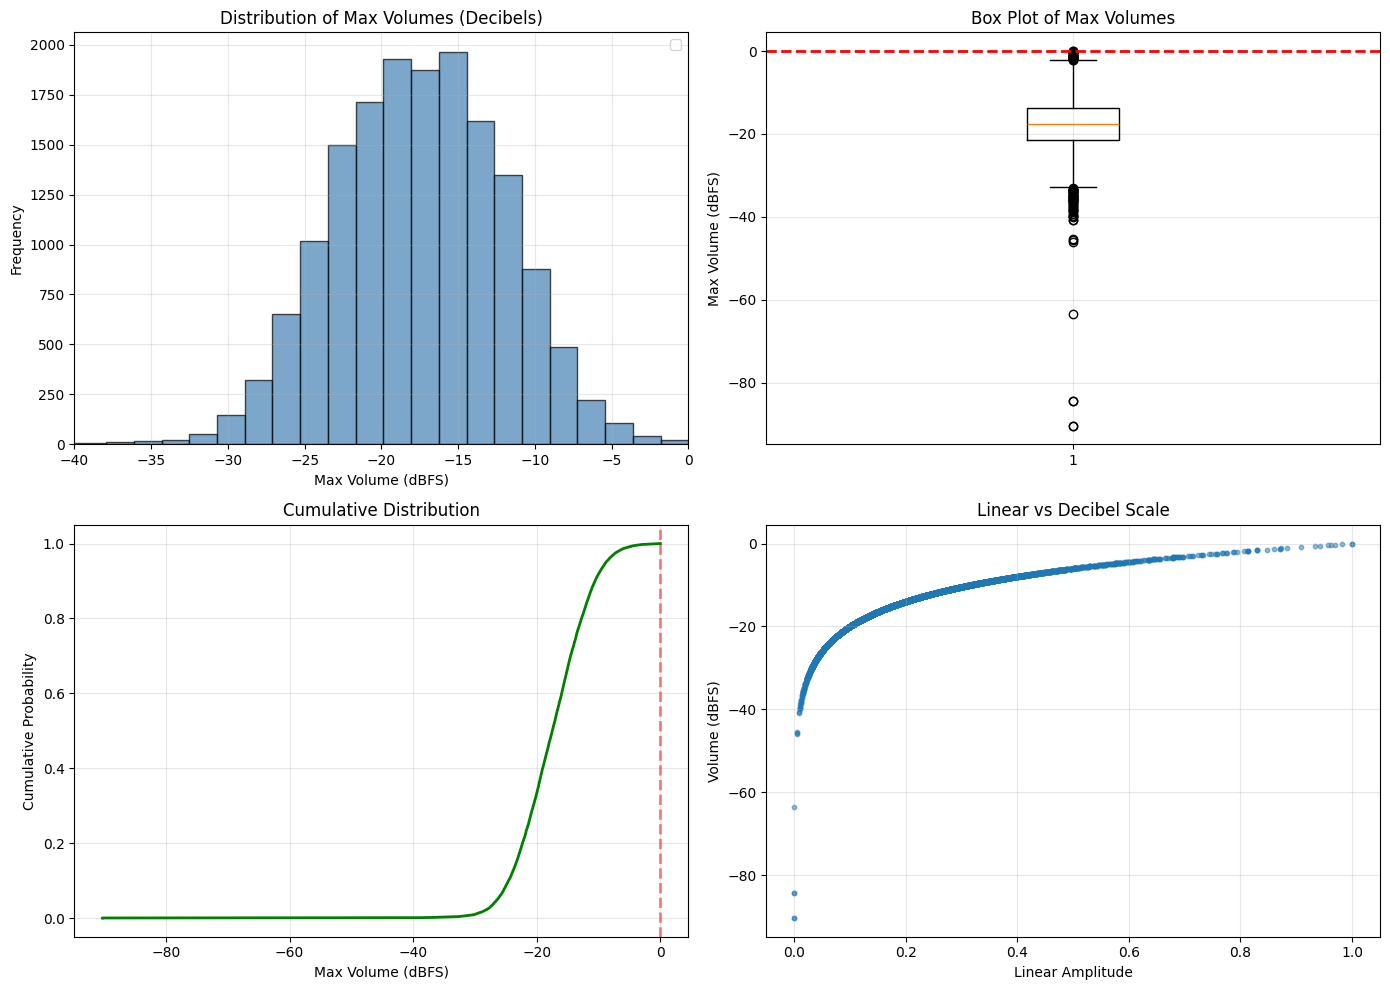


Sample of files with highest volumes:
                   filename  max_volume_dB  max_volume_linear
7956   870m8sxx7ls861y4.wav   8.685890e-10           1.000000
8967   muziszlie8rwn01c.wav   8.685890e-10           1.000000
11009  hz4lqcns6wpr0f17.wav  -1.532301e-01           0.982513
13105  419270jzy10ls1u8.wav  -2.749449e-01           0.968842
1772   1tjsu760z96oh1bi.wav  -3.301127e-01           0.962708
2413   w8lwalwkmylr16mf.wav  -3.872960e-01           0.956390
10360  u06s37qmqhr5pkjg.wav  -5.115159e-01           0.942810
15368  85i2ira8752k5awn.wav  -5.928672e-01           0.934021
14501  dyfwf13tj221qtdo.wav  -8.325467e-01           0.908600
11906  kjtucc2zeoeozcp0.wav  -1.080529e+00           0.883026

Sample of files with lowest volumes:
                   filename  max_volume_dB  max_volume_linear
2169   ak6icah5v9sdvlk7.wav     -90.308970           0.000031
10301  zkzuig3yszxrsv2h.wav     -90.308970           0.000031
960    rip9vpuswcm8zl59.wav     -84.288385           0.

,filename,max_volume_linear,max_volume_dB
0,hfowhwgkzvw7jv48.wav,0.209473,-13.577453
1,e5d20co120n4vl24.wav,0.265442,-11.520611
2,v2a9d6i3wkx5n566.wav,0.178436,-14.970337
3,txnm3jiw18lklo0l.wav,0.207611,-13.654989
4,twz8sa6uq475pfjv.wav,0.177521,-15.015017


In [4]:
import os
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from tqdm.notebook import tqdm

# Path to your audio files
path2 = "/home/user/datasets/PolSESS_C_both/PolSESS_C_both/train/scene"

# Get all WAV files
wav_files = list(Path(path2).glob("*.wav"))
print(f"Found {len(wav_files)} WAV files")

# Store max volumes
max_volumes_linear = []
max_volumes_db = []
filenames = []

# Process each file
for wav_file in tqdm(wav_files, desc="Processing WAV files"):
    try:
        # Load audio
        audio, sr = sf.read(wav_file)
        
        # Get max absolute value (linear amplitude)
        if audio.ndim > 1:  # Stereo - take max across all channels
            max_vol_linear = np.max(np.abs(audio))
        else:  # Mono
            max_vol_linear = np.max(np.abs(audio))
        
        # Convert to dB (dBFS - decibels relative to full scale)
        # Avoid log(0) by using a small epsilon
        epsilon = 1e-10
        max_vol_db = 20 * np.log10(max_vol_linear + epsilon)
        
        max_volumes_linear.append(max_vol_linear)
        max_volumes_db.append(max_vol_db)
        filenames.append(wav_file.name)
    except Exception as e:
        print(f"Error processing {wav_file.name}: {e}")

# Create DataFrame
df = pd.DataFrame({
    'filename': filenames,
    'max_volume_linear': max_volumes_linear,
    'max_volume_dB': max_volumes_db
})

# Display statistics
print("\n" + "="*50)
print("Volume Statistics:")
print("="*50)
print("Linear amplitude:")
print(df['max_volume_linear'].describe())
print(f"\nDecibels (dBFS):")
print(df['max_volume_dB'].describe())
print(f"\nMin volume: {df['max_volume_dB'].min():.2f} dB ({df['max_volume_linear'].min():.6f} linear)")
print(f"Max volume: {df['max_volume_dB'].max():.2f} dB ({df['max_volume_linear'].max():.6f} linear)")
print(f"Mean volume: {df['max_volume_dB'].mean():.2f} dB")
print(f"Median volume: {df['max_volume_dB'].median():.2f} dB")

# Visualize distribution (using dB scale)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram (dB)
axes[0, 0].hist(max_volumes_db, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Max Volume (dBFS)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Max Volumes (Decibels)')
axes[0, 0].set_xlim(-40, 0)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Box plot (dB)
axes[0, 1].boxplot(max_volumes_db, vert=True)
axes[0, 1].set_ylabel('Max Volume (dBFS)')
axes[0, 1].set_title('Box Plot of Max Volumes')
axes[0, 1].axhline(0, color='red', linestyle='--', linewidth=2, label='0 dBFS')
axes[0, 1].grid(True, alpha=0.3)

# Cumulative distribution (dB)
sorted_volumes = np.sort(max_volumes_db)
cumulative = np.arange(1, len(sorted_volumes) + 1) / len(sorted_volumes)
axes[1, 0].plot(sorted_volumes, cumulative, linewidth=2, color='green')
axes[1, 0].set_xlabel('Max Volume (dBFS)')
axes[1, 0].set_ylabel('Cumulative Probability')
axes[1, 0].set_title('Cumulative Distribution')
axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=2, alpha=0.5)
axes[1, 0].grid(True, alpha=0.3)

# Scatter plot: Linear vs dB
axes[1, 1].scatter(max_volumes_linear, max_volumes_db, alpha=0.5, s=10)
axes[1, 1].set_xlabel('Linear Amplitude')
axes[1, 1].set_ylabel('Volume (dBFS)')
axes[1, 1].set_title('Linear vs Decibel Scale')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display sample of data
print("\n" + "="*50)
print("Sample of files with highest volumes:")
print("="*50)
print(df.nlargest(10, 'max_volume_dB')[['filename', 'max_volume_dB', 'max_volume_linear']])

print("\n" + "="*50)
print("Sample of files with lowest volumes:")
print("="*50)
print(df.nsmallest(10, 'max_volume_dB')[['filename', 'max_volume_dB', 'max_volume_linear']])

# The DataFrame 'df' contains all the data if you need further analysis
df.head()